In [164]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "D:/ML/"
print(DOWNLOAD_ROOT)
DATASET_PATH = os.path.join("datasets", "Countries")
DIR_PATH = {"Afganistan":os.path.join(DATASET_PATH, "Afganistan"),
            "China":os.path.join(DATASET_PATH, "China"),
            "CAR":os.path.join(DATASET_PATH, "CAR"),
           "Ethiopia":os.path.join(DATASET_PATH, "Ethiopia"),
           "India":os.path.join(DATASET_PATH, "India"),
           "Iran":os.path.join(DATASET_PATH, "Iran"),
            "KNDR":os.path.join(DATASET_PATH, "KNDR"),
            "Libya":os.path.join(DATASET_PATH, "Libya"),
           "Morocco":os.path.join(DATASET_PATH, "Morocco"),
           "Sudan":os.path.join(DATASET_PATH, "Sudan"),
           "Syria":os.path.join(DATASET_PATH, "Syria"),
           "Turkey":os.path.join(DATASET_PATH, "Turkey"),
            "Argentina":os.path.join(DATASET_PATH, "Argentina"),
            "DRK_Congo":os.path.join(DATASET_PATH, "DRK_Congo"),
            "Burkina Faso":os.path.join(DATASET_PATH, "Burkina Faso"),
            "Niger":os.path.join(DATASET_PATH, "Niger"),
            "Mali":os.path.join(DATASET_PATH, "Mali"),
            "Senegal":os.path.join(DATASET_PATH, "Senegal"),
            "Egipet":os.path.join(DATASET_PATH, "Egipet"),
            "Gvineya":os.path.join(DATASET_PATH, "Gvineya"),
            "Venesuela":os.path.join(DATASET_PATH, "Venesuela"),
            "Algeria":os.path.join(DATASET_PATH, "Algeria"),
            "Zimbabve":os.path.join(DATASET_PATH, "Zimbabve"),
            "Tunis":os.path.join(DATASET_PATH, "Tunis"),
            "Chad":os.path.join(DATASET_PATH, "Chad"),
            "GanaGana":os.path.join(DATASET_PATH, "Gana"),
            "Pakistan":os.path.join(DATASET_PATH, "Pakistan"),
            "Vetnam":os.path.join(DATASET_PATH, "Vetnam"),
            "Laos":os.path.join(DATASET_PATH, "Laos"),
           }
filenames = {}
for items in DIR_PATH.keys():
    print(items)
    filenames[items] = [name for name in sorted(os.listdir(DIR_PATH[items])) ] 

D:/ML/
Afganistan
China
CAR
Ethiopia
India
Iran
KNDR
Libya
Morocco
Sudan
Syria
Turkey
Argentina
DRK_Congo
Burkina Faso
Niger
Mali
Senegal
Egipet
Gvineya
Venesuela
Algeria
Zimbabve
Tunis
Chad
GanaGana
Pakistan
Vetnam
Laos


In [165]:
stemming=False # Stemming control
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

In [166]:
ru_stopwords = set(
        """
    –∞ –∞–≤–æ—Å—å –∞–≥–∞ –∞–≥—É –∞–∂ –∞–π –∞–ª–∏ –∞–ª–ª–æ –∞—É –∞—Ö –∞—è
    –± –±—É–¥–µ–º –±—É–¥–µ—Ç –±—É–¥–µ—Ç–µ –±—É–¥–µ—à—å –±—É–¥—É –±—É–¥—É—Ç –±—É–¥—É—á–∏ –±—É–¥—å –±—É–¥—å—Ç–µ –±—ã –±—ã–ª –±—ã–ª–∞ –±—ã–ª–∏ –±—ã–ª–æ
    –±—ã—Ç—å –±–∞—Ü –±–µ–∑ –±–µ–∑—É—Å–ª–æ–≤–Ω–æ –±–∏—à—å –±–ª–∞–≥–æ –±–ª–∞–≥–æ–¥–∞—Ä—è –±–ª–∏–∂–∞–π—à–∏–µ –±–ª–∏–∑–∫–æ –±–æ–ª–µ–µ –±–æ–ª—å—à–µ
    –±—É–¥—Ç–æ –±—ã–≤–∞–µ—Ç –±—ã–≤–∞–ª–∞ –±—ã–≤–∞–ª–∏ –±—ã–≤–∞—é –±—ã–≤–∞—é—Ç –±—ã—Ç—É–µ—Ç
    –≤ –≤–∞–º –≤–∞–º–∏ –≤–∞—Å –≤–µ—Å—å –≤–æ –≤–æ—Ç –≤—Å–µ –≤—Å—ë –≤—Å–µ–≥–æ –≤—Å–µ–π –≤—Å–µ–º –≤—Å—ë–º –≤—Å–µ–º–∏ –≤—Å–µ–º—É –≤—Å–µ—Ö –≤—Å–µ—é
    –≤—Å–µ—è –≤—Å—é –≤—Å—è –≤—ã –≤–∞—à –≤–∞—à–∞ –≤–∞—à–µ –≤–∞—à–∏ –≤–¥–∞–ª–∏ –≤–¥–æ–±–∞–≤–æ–∫ –≤–¥—Ä—É–≥ –≤–µ–¥—å –≤–µ–∑–¥–µ –≤–µ—Ä–Ω–µ–µ
    –≤–∑–∞–∏–º–Ω–æ –≤–∑–∞–ø—Ä–∞–≤–¥—É –≤–∏–¥–Ω–æ –≤–∏—à—å –≤–∫–ª—é—á–∞—è –≤–º–µ—Å—Ç–æ –≤–Ω–∞–∫–ª–∞–¥–µ –≤–Ω–∞—á–∞–ª–µ –≤–Ω–µ –≤–Ω–∏–∑ –≤–Ω–∏–∑—É
    –≤–Ω–æ–≤—å –≤–æ–≤—Å–µ –≤–æ–∑–º–æ–∂–Ω–æ –≤–æ–∏—Å—Ç–∏–Ω—É –≤–æ–∫—Ä—É–≥ –≤–æ–Ω –≤–æ–æ–±—â–µ –≤–æ–ø—Ä–µ–∫–∏ –≤–ø–µ—Ä–µ–∫–æ—Ä –≤–ø–ª–æ—Ç—å
    –≤–ø–æ–ª–Ω–µ –≤–ø—Ä–∞–≤–¥—É –≤–ø—Ä–∞–≤–µ –≤–ø—Ä–æ—á–µ–º –≤–ø—Ä—è–º—å –≤—Ä–µ—Å–Ω–æ—Ç—É –≤—Ä–æ–¥–µ –≤—Ä—è–¥ –≤—Å–µ–≥–¥–∞ –≤—Å—é–¥—É
    –≤—Å—è–∫–∏–π –≤—Å—è–∫–æ–≥–æ –≤—Å—è–∫–æ–π –≤—Å—è—á–µ—Å–∫–∏ –≤—á–µ—Ä–µ–¥
    –≥ –≥–æ –≥–¥–µ –≥–æ—Ä–∞–∑–¥–æ –≥–∞–≤
    –¥ –¥–∞ –¥–ª—è –¥–æ –¥–∞–±—ã –¥–∞–≤–∞–π—Ç–µ –¥–∞–≤–Ω–æ –¥–∞–≤–Ω—ã–º –¥–∞–∂–µ –¥–∞–ª–µ–µ –¥–∞–ª–µ–∫–æ –¥–∞–ª—å—à–µ –¥–∞–Ω–Ω–∞—è
    –¥–∞–Ω–Ω–æ–≥–æ –¥–∞–Ω–Ω–æ–µ –¥–∞–Ω–Ω–æ–π –¥–∞–Ω–Ω–æ–º –¥–∞–Ω–Ω–æ–º—É –¥–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–π –¥–∞–Ω–Ω—ã—Ö –¥–∞–Ω—É –¥–∞–Ω—É–Ω–∞—Ö
    –¥–∞—Ä–æ–º –¥–µ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –¥–æ–≤–æ–ª—å–Ω–æ –¥–æ–∫–æ–ª–µ –¥–æ–∫–æ–ª—å –¥–æ–ª–≥–æ –¥–æ–ª–∂–µ–Ω –¥–æ–ª–∂–Ω–∞
    –¥–æ–ª–∂–Ω–æ –¥–æ–ª–∂–Ω—ã –¥–æ–ª–∂–Ω—ã–π –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –¥—Ä—É–≥–∞—è –¥—Ä—É–≥–∏–µ –¥—Ä—É–≥–∏–º –¥—Ä—É–≥–∏–º–∏
    –¥—Ä—É–≥–∏—Ö –¥—Ä—É–≥–æ–µ –¥—Ä—É–≥–æ–π
    –µ –µ–≥–æ –µ–¥–∏–º –µ–¥—è—Ç –µ–µ –µ—ë –µ–π –µ–ª –µ–ª–∞ –µ–º –µ–º—É –µ–º—ä –µ—Å–ª–∏ –µ—Å—Ç –µ—Å—Ç—å –µ—à—å –µ—â–µ –µ—â—ë –µ—é –µ–¥–≤–∞
    –µ–∂–µ–ª–∏ –µ–ª–µ
    –∂ –∂–µ
    –∑ –∑–∞ –∑–∞—Ç–µ–º –∑–∞—Ç–æ –∑–∞—á–µ–º –∑–¥–µ—Å—å –∑–Ω–∞—á–∏—Ç –∑—Ä—è
    –∏ –∏–∑ –∏–ª–∏ –∏–º –∏–º–∏ –∏–º—ä –∏—Ö –∏–±–æ –∏–ª—å –∏–º–µ–µ—Ç –∏–º–µ–ª –∏–º–µ–ª–∞ –∏–º–µ–ª–æ –∏–º–µ–Ω–Ω–æ –∏–º–µ—Ç—å –∏–Ω–∞—á–µ
    –∏–Ω–æ–≥–¥–∞ –∏–Ω—ã–º –∏–Ω—ã–º–∏ –∏—Ç–∞–∫ –∏—à—å
    –π
    –∫ –∫–∞–∫ –∫–µ–º –∫–æ –∫–æ–≥–¥–∞ –∫–æ–≥–æ –∫–æ–º –∫–æ–º—É –∫–æ–º—å—è –∫–æ—Ç–æ—Ä–∞—è –∫–æ—Ç–æ—Ä–æ–≥–æ –∫–æ—Ç–æ—Ä–æ–µ –∫–æ—Ç–æ—Ä–æ–π –∫–æ—Ç–æ—Ä–æ–º
    –∫–æ—Ç–æ—Ä–æ–º—É –∫–æ—Ç–æ—Ä–æ—é –∫–æ—Ç–æ—Ä—É—é –∫–æ—Ç–æ—Ä—ã–µ –∫–æ—Ç–æ—Ä—ã–π –∫–æ—Ç–æ—Ä—ã–º –∫–æ—Ç–æ—Ä—ã–º–∏ –∫–æ—Ç–æ—Ä—ã—Ö –∫—Ç–æ –∫–∞ –∫–∞–±—ã
    –∫–∞–∂–¥–∞—è –∫–∞–∂–¥–æ–µ –∫–∞–∂–¥—ã–µ –∫–∞–∂–¥—ã–π –∫–∞–∂–µ—Ç—Å—è –∫–∞–∑–∞–ª–∞—Å—å –∫–∞–∑–∞–ª–∏—Å—å –∫–∞–∑–∞–ª–æ—Å—å –∫–∞–∑–∞–ª—Å—è –∫–∞–∑–∞—Ç—å—Å—è
    –∫–∞–∫–∞—è –∫–∞–∫–∏–µ –∫–∞–∫–∏–º –∫–∞–∫–∏–º–∏ –∫–∞–∫–æ–≤ –∫–∞–∫–æ–≥–æ –∫–∞–∫–æ–π –∫–∞–∫–æ–º—É –∫–∞–∫–æ—é –∫–∞—Å–∞—Ç–µ–ª—å–Ω–æ –∫–æ–π –∫–æ–ª–∏
    –∫–æ–ª—å –∫–æ–Ω–µ—á–Ω–æ –∫–æ—Ä–æ—á–µ –∫—Ä–æ–º–µ –∫—Å—Ç–∞—Ç–∏ –∫—É –∫—É–¥–∞
    –ª –ª–∏ –ª–∏–±–æ –ª–∏—à—å –ª—é–±–∞—è –ª—é–±–æ–≥–æ –ª—é–±–æ–µ –ª—é–±–æ–π –ª—é–±–æ–º –ª—é–±—É—é –ª—é–±—ã–º–∏ –ª—é–±—ã—Ö
    –º –º–µ–Ω—è –º–Ω–µ –º–Ω–æ–π –º–Ω–æ—é –º–æ–≥ –º–æ–≥–∏ –º–æ–≥–∏—Ç–µ –º–æ–≥–ª–∞ –º–æ–≥–ª–∏ –º–æ–≥–ª–æ –º–æ–≥—É –º–æ–≥—É—Ç –º–æ–µ –º–æ—ë –º–æ–µ–≥–æ
    –º–æ–µ–π –º–æ–µ–º –º–æ—ë–º –º–æ–µ–º—É –º–æ–µ—é –º–æ–∂–µ–º –º–æ–∂–µ—Ç –º–æ–∂–µ—Ç–µ –º–æ–∂–µ—à—å –º–æ–∏ –º–æ–π –º–æ–∏–º –º–æ–∏–º–∏ –º–æ–∏—Ö
    –º–æ—á—å –º–æ—é –º–æ—è –º—ã –º–∞–ª–æ –º–µ–∂ –º–µ–∂–¥—É –º–µ–Ω–µ–µ –º–µ–Ω—å—à–µ –º–∏–º–æ –º–Ω–æ–≥–∏–µ –º–Ω–æ–≥–æ –º–Ω–æ–≥–æ–≥–æ –º–Ω–æ–≥–æ–µ
    –º–Ω–æ–≥–æ–º –º–Ω–æ–≥–æ–º—É –º–æ–∂–Ω–æ –º–æ–ª –º—É
    –Ω –Ω–∞ –Ω–∞–º –Ω–∞–º–∏ –Ω–∞—Å –Ω–∞—Å–∞ –Ω–∞—à –Ω–∞—à–∞ –Ω–∞—à–µ –Ω–∞—à–µ–≥–æ –Ω–∞—à–µ–π –Ω–∞—à–µ–º –Ω–∞—à–µ–º—É –Ω–∞—à–µ—é –Ω–∞—à–∏ –Ω–∞—à–∏–º
    –Ω–∞—à–∏–º–∏ –Ω–∞—à–∏—Ö –Ω–∞—à—É –Ω–µ –Ω–µ–≥–æ –Ω–µ–µ –Ω–µ—ë –Ω–µ–π –Ω–µ–º –Ω—ë–º –Ω–µ–º—É –Ω–µ—Ç –Ω–µ—é –Ω–∏–º –Ω–∏–º–∏ –Ω–∏—Ö –Ω–æ
    –Ω–∞–≤–µ—Ä–Ω—è–∫–∞ –Ω–∞–≤–µ—Ä—Ö—É –Ω–∞–≤—Ä—è–¥ –Ω–∞–≤—ã–≤–æ—Ä–æ—Ç –Ω–∞–¥ –Ω–∞–¥–æ –Ω–∞–∑–∞–¥ –Ω–∞–∏–±–æ–ª–µ–µ –Ω–∞–∏–∑–≤–æ—Ä–æ—Ç
    –Ω–∞–∏–∑–Ω–∞–Ω–∫—É –Ω–∞–∏–ø–∞—á–µ –Ω–∞–∫–∞–Ω—É–Ω–µ –Ω–∞–∫–æ–Ω–µ—Ü –Ω–∞–æ–±–æ—Ä–æ—Ç –Ω–∞–ø–µ—Ä–µ–¥ –Ω–∞–ø–µ—Ä–µ–∫–æ—Ä –Ω–∞–ø–æ–¥–æ–±–∏–µ
    –Ω–∞–ø—Ä–∏–º–µ—Ä –Ω–∞–ø—Ä–æ—Ç–∏–≤ –Ω–∞–ø—Ä—è–º—É—é –Ω–∞—Å–∏–ª—É –Ω–∞—Å—Ç–æ—è—â–∞—è –Ω–∞—Å—Ç–æ—è—â–µ–µ –Ω–∞—Å—Ç–æ—è—â–∏–µ –Ω–∞—Å—Ç–æ—è—â–∏–π
    –Ω–∞—Å—á–µ—Ç –Ω–∞—Ç–µ –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –Ω–∞—á–∞–ª–∞ –Ω–∞—á–∞–ª–µ –Ω–µ–≤–∞–∂–Ω–æ –Ω–µ–≥–¥–µ –Ω–µ–¥–∞–≤–Ω–æ –Ω–µ–¥–∞–ª–µ–∫–æ –Ω–µ–∑–∞—á–µ–º
    –Ω–µ–∫–µ–º –Ω–µ–∫–æ–≥–¥–∞ –Ω–µ–∫–æ–º—É –Ω–µ–∫–æ—Ç–æ—Ä–∞—è –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã–π –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ–∫—Ç–æ –Ω–µ–∫—É–¥–∞
    –Ω–µ–ª—å–∑—è –Ω–µ–º–Ω–æ–≥–∏–µ –Ω–µ–º–Ω–æ–≥–∏–º –Ω–µ–º–Ω–æ–≥–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ
    –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–º –Ω–µ–æ—Ç–∫—É–¥–∞ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ –Ω–µ—Ä–µ–¥–∫–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–µ—Ç—É –Ω–µ—É–∂–µ–ª–∏ –Ω–µ—á–µ–≥–æ
    –Ω–µ—á–µ–º –Ω–µ—á–µ–º—É –Ω–µ—á—Ç–æ –Ω–µ—à—Ç–æ –Ω–∏–±—É–¥—å –Ω–∏–≥–¥–µ –Ω–∏–∂–µ –Ω–∏–∑–∫–æ –Ω–∏–∫–∞–∫ –Ω–∏–∫–∞–∫–æ–π –Ω–∏–∫–µ–º
    –Ω–∏–∫–æ–≥–¥–∞ –Ω–∏–∫–æ–≥–æ –Ω–∏–∫–æ–º—É –Ω–∏–∫—Ç–æ –Ω–∏–∫—É–¥–∞ –Ω–∏–æ—Ç–∫—É–¥–∞ –Ω–∏–ø–æ—á–µ–º –Ω–∏—á–µ–≥–æ –Ω–∏—á–µ–º –Ω–∏—á–µ–º—É
    –Ω–∏—á—Ç–æ –Ω—É –Ω—É–∂–Ω–∞—è –Ω—É–∂–Ω–æ –Ω—É–∂–Ω–æ–≥–æ –Ω—É–∂–Ω—ã–µ –Ω—É–∂–Ω—ã–π –Ω—É–∂–Ω—ã—Ö –Ω—ã–Ω–µ –Ω—ã–Ω–µ—à–Ω–µ–µ –Ω—ã–Ω–µ—à–Ω–µ–π
    –Ω—ã–Ω–µ—à–Ω–∏—Ö –Ω—ã–Ω—á–µ
    –æ –æ–± –æ–¥–∏–Ω –æ–¥–Ω–∞ –æ–¥–Ω–∏ –æ–¥–Ω–∏–º –æ–¥–Ω–∏–º–∏ –æ–¥–Ω–∏—Ö –æ–¥–Ω–æ –æ–¥–Ω–æ–≥–æ –æ–¥–Ω–æ–π –æ–¥–Ω–æ–º –æ–¥–Ω–æ–º—É –æ–¥–Ω–æ—é
    –æ–¥–Ω—É –æ–Ω –æ–Ω–∞ –æ–Ω–µ –æ–Ω–∏ –æ–Ω–æ –æ—Ç –æ–±–∞ –æ–±—â—É—é –æ–±—ã—á–Ω–æ –æ–≥–æ –æ–¥–Ω–∞–∂–¥—ã –æ–¥–Ω–∞–∫–æ –æ–π –æ–∫–æ–ª–æ –æ–Ω—ã–π
    –æ–ø –æ–ø—è—Ç—å –æ—Å–æ–±–µ–Ω–Ω–æ –æ—Å–æ–±–æ –æ—Å–æ–±—É—é –æ—Å–æ–±—ã–µ –æ—Ç–∫—É–¥–∞ –æ—Ç–Ω–µ–ª–∏–∂–∞ –æ—Ç–Ω–µ–ª–∏–∂–µ –æ—Ç–æ–≤—Å—é–¥—É
    –æ—Ç—Å—é–¥–∞ –æ—Ç—Ç–æ–≥–æ –æ—Ç—Ç–æ—Ç –æ—Ç—Ç—É–¥–∞ –æ—Ç—á–µ–≥–æ –æ—Ç—á–µ–º—É –æ—Ö –æ—á–µ–≤–∏–¥–Ω–æ –æ—á–µ–Ω—å –æ–º
    –ø –ø–æ –ø—Ä–∏ –ø–∞—á–µ –ø–µ—Ä–µ–¥ –ø–æ–¥ –ø–æ–¥–∞–≤–Ω–æ –ø–æ–¥–∏ –ø–æ–¥–æ–±–Ω–∞—è –ø–æ–¥–æ–±–Ω–æ –ø–æ–¥–æ–±–Ω–æ–≥–æ –ø–æ–¥–æ–±–Ω—ã–µ
    –ø–æ–¥–æ–±–Ω—ã–π –ø–æ–¥–æ–±–Ω—ã–º –ø–æ–¥–æ–±–Ω—ã—Ö –ø–æ–µ–ª–∏–∫—É –ø–æ–∂–∞–ª—É–π –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –ø–æ–∑–∂–µ –ø–æ–∏—Å—Ç–∏–Ω–µ
    –ø–æ–∫–∞ –ø–æ–∫–∞–º–µ—Å—Ç –ø–æ–∫–æ–ª–µ –ø–æ–∫–æ–ª—å –ø–æ–∫—É–¥–∞ –ø–æ–∫—É–¥–æ–≤–∞ –ø–æ–º–∏–º–æ –ø–æ–Ω–µ–∂–µ –ø–æ–ø—Ä–∏—â–µ –ø–æ—Ä
    –ø–æ—Ä–∞ –ø–æ—Å–µ–º—É –ø–æ—Å–∫–æ–ª—å–∫—É –ø–æ—Å–ª–µ –ø–æ—Å—Ä–µ–¥–∏ –ø–æ—Å—Ä–µ–¥—Å—Ç–≤–æ–º –ø–æ—Ç–æ–º –ø–æ—Ç–æ–º—É –ø–æ—Ç–æ–º—É—à—Ç–∞
    –ø–æ—Ö–æ–∂–µ–º –ø–æ—á–µ–º—É –ø–æ—á—Ç–∏ –ø–æ—ç—Ç–æ–º—É –ø—Ä–µ–∂–¥–µ –ø—Ä–∏—Ç–æ–º –ø—Ä–∏—á–µ–º –ø—Ä–æ –ø—Ä–æ—Å—Ç–æ –ø—Ä–æ—á–µ–≥–æ
    –ø—Ä–æ—á–µ–µ –ø—Ä–æ—á–µ–º—É –ø—Ä–æ—á–∏–º–∏ –ø—Ä–æ—â–µ –ø—Ä—è–º –ø—É—Å—Ç—å
    —Ä —Ä–∞–¥–∏ —Ä–∞–∑–≤–µ —Ä–∞–Ω–µ–µ —Ä–∞–Ω–æ —Ä–∞–Ω—å—à–µ —Ä—è–¥–æ–º
    —Å —Å–∞–º —Å–∞–º–∞ —Å–∞–º–∏ —Å–∞–º–∏–º —Å–∞–º–∏–º–∏ —Å–∞–º–∏—Ö —Å–∞–º–æ —Å–∞–º–æ–≥–æ —Å–∞–º–æ–º —Å–∞–º–æ–º—É —Å–∞–º—É —Å–≤–æ–µ —Å–≤–æ—ë
    —Å–≤–æ–µ–≥–æ —Å–≤–æ–µ–π —Å–≤–æ–µ–º —Å–≤–æ—ë–º —Å–≤–æ–µ–º—É —Å–≤–æ–µ—é —Å–≤–æ–∏ —Å–≤–æ–π —Å–≤–æ–∏–º —Å–≤–æ–∏–º–∏ —Å–≤–æ–∏—Ö —Å–≤–æ—é —Å–≤–æ—è
    —Å–µ–±–µ —Å–µ–±—è —Å–æ–±–æ–π —Å–æ–±–æ—é —Å–∞–º–∞—è —Å–∞–º–æ–µ —Å–∞–º–æ–π —Å–∞–º—ã–π —Å–∞–º—ã—Ö —Å–≤–µ—Ä—Ö —Å–≤—ã—à–µ —Å–µ —Å–µ–≥–æ —Å–µ–π
    —Å–µ–π—á–∞—Å —Å–∏–µ —Å–∏—Ö —Å–∫–≤–æ–∑—å —Å–∫–æ–ª—å–∫–æ —Å–∫–æ—Ä–µ–µ —Å–∫–æ—Ä–æ —Å–ª–µ–¥—É–µ—Ç —Å–ª–∏—à–∫–æ–º —Å–º–æ–≥—É—Ç —Å–º–æ–∂–µ—Ç
    —Å–Ω–∞—á–∞–ª–∞ —Å–Ω–æ–≤–∞ —Å–æ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ —Å–æ–≤—Å–µ–º —Å–ø–µ—Ä–≤–∞ —Å–ø–æ–∫–æ–Ω—É —Å–ø—É—Å—Ç—è —Å—Ä–∞–∑—É —Å—Ä–µ–¥–∏ —Å—Ä–æ–¥–Ω–∏
    —Å—Ç–∞–ª —Å—Ç–∞–ª–∞ —Å—Ç–∞–ª–∏ —Å—Ç–∞–ª–æ —Å—Ç–∞—Ç—å —Å—É—Ç—å —Å—ã–∑–Ω–æ–≤–∞
    —Ç–∞ —Ç–æ —Ç—É —Ç—ã —Ç–∏ —Ç–∞–∫ —Ç–∞–∫–∞—è —Ç–∞–∫–∏–µ —Ç–∞–∫–∏–º —Ç–∞–∫–∏–º–∏ —Ç–∞–∫–∏—Ö —Ç–∞–∫–æ–≥–æ —Ç–∞–∫–æ–µ —Ç–∞–∫–æ–π —Ç–∞–∫–æ–º —Ç–∞–∫–æ–º—É —Ç–∞–∫–æ—é
    —Ç–∞–∫—É—é —Ç–µ —Ç–µ–±–µ —Ç–µ–±—è —Ç–µ–º —Ç–µ–º–∏ —Ç–µ—Ö —Ç–æ–±–æ–π —Ç–æ–±–æ—é —Ç–æ–≥–æ —Ç–æ–π —Ç–æ–ª—å–∫–æ —Ç–æ–º —Ç–æ–º–∞—Ö —Ç–æ–º—É
    —Ç–æ—Ç —Ç–æ—é —Ç–∞–∫–∂–µ —Ç–∞–∫–∏ —Ç–∞–∫–æ–≤ —Ç–∞–∫–æ–≤–∞ —Ç–∞–º —Ç–≤–æ–∏ —Ç–≤–æ–∏–º —Ç–≤–æ–∏—Ö —Ç–≤–æ–π —Ç–≤–æ—è —Ç–≤–æ—ë
    —Ç–µ–ø–µ—Ä—å —Ç–æ–≥–¥–∞ —Ç–æ–∂–µ —Ç–æ—Ç—á–∞—Å —Ç–æ—á–Ω–æ —Ç—É–¥–∞ —Ç—É—Ç —Ç—å—Ñ—É —Ç–∞—è
    —É —É–∂–µ —É–≤—ã —É–∂ —É—Ä–∞ —É—Ö —É—é
    —Ñ —Ñ—É
    —Ö —Ö–∞ —Ö–µ —Ö–æ—Ä–æ—à–æ —Ö–æ—Ç–µ–ª —Ö–æ—Ç–µ–ª–∞ —Ö–æ—Ç–µ–ª–æ—Å—å —Ö–æ—Ç–µ—Ç—å —Ö–æ—Ç—å —Ö–æ—Ç—è —Ö–æ—á–µ—à—å —Ö–æ—á—É —Ö—É–∂–µ
    —á —á–µ–≥–æ —á–µ–º —á—ë–º —á–µ–º—É —á—Ç–æ —á—Ç–æ–±—ã —á–∞—Å—Ç–æ —á–∞—â–µ —á–µ–π —á–µ—Ä–µ–∑ —á—Ç–æ–± —á—É—Ç—å —á—Ö–∞—Ç—å —á—å–∏–º
    —á—å–∏—Ö —á—å—ë —á—ë
    —à —à–∞
    —â —â–∞ —â–∞—Å
    —ã —ã—Ö —ã–µ —ã–π
    —ç —ç—Ç–∞ —ç—Ç–∏ —ç—Ç–∏–º —ç—Ç–∏–º–∏ —ç—Ç–∏—Ö —ç—Ç–æ —ç—Ç–æ–≥–æ —ç—Ç–æ–π —ç—Ç–æ–º —ç—Ç–æ–º—É —ç—Ç–æ—Ç —ç—Ç–æ—é —ç—Ç—É —ç–¥–∞–∫ —ç–¥–∞–∫–∏–π
    —ç–π —ç–∫–∞ —ç–∫–∏–π —ç—Ç–∞–∫ —ç—Ç–∞–∫–∏–π —ç—Ö
    —é
    —è —è–≤–Ω–æ —è–≤–Ω—ã—Ö —è–∫–æ —è–∫–æ–±—ã —è–∫–æ–∂–µ
    
    –∏ —á—Ç–æ –Ω–µ —ç—Ç–æ  –±—ã—Ç—å —ç—Ç–æ—Ç —ç—Ç–æ —Å–≤–æ–π –∫–∞–∫ - —ç—Ç–æ—Ç –≤–µ—Å—å –±—ã—Ç—å —á—Ç–æ ‚ñ´ –Ω–æ –≥. %

    afgbezparandzhi argentinarusa irandezhurniy info raspp –∞–ª—å
    """.split()
    )

In [167]:
from charset_normalizer import from_path
import string

def remove_chars_from_text(text, chars):
    # return "".join([ch for ch in text if ch not in chars])
    content = ''
    for ch in text:
        if ch not in chars:
            content = content + ''.join(ch)
        else:
            content = content + ''.join(' ')
    return content

import re

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
spec_chars = string.punctuation + '\r' + '\n\xa0¬´¬ª\t‚Äî‚Ä¶' 

x_temp = []
y_temp = []
for item in filenames.keys():
    post_temp=[]
    for names in filenames[item]:
        content = str(from_path(DIR_PATH[item]+"\\"+names).best()).lower()  
        content = remove_emojis(content)
        # content = re.sub(r'(\\u[0-9A-Fa-f]+)', lambda matchobj: chr(int(matchobj.group(0)[2:], 16)), content)
        content = remove_chars_from_text(content, spec_chars)
        content = remove_chars_from_text(content, string.digits)
        for i in range(1, 10):
            content = content.replace('  ', ' ')
        filtered_words = []
        for token in content.split():
            if token not in ru_stopwords and len(token)>2:
                if stemming and token is not None:
                    filtered_words.append(stemmer.stem(token))
                    #print('{} -{}'.format(token,stemmer.stem(token)))
                else:
                    filtered_words.append(token)
                      
        content = ' '.join(filtered_words)                
        x_temp.append(content)
        y_temp.append(item)

In [168]:
len(x_temp)

8658

In [169]:
from sklearn.feature_extraction.text import CountVectorizer

count_ngram = CountVectorizer(ngram_range=(2,2))
X_train_transformed_ngram = count_ngram.fit_transform(x_temp)

In [170]:
vocab = count_ngram.vocabulary_

In [171]:
count_values = X_train_transformed_ngram.toarray().sum(axis=0)
ng_text_feq =[]
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    if ng_count>7:
        #print(ng_count, ng_text)
        ng_text_feq.append(ng_text)

In [172]:
len(ng_text_feq)

8001

In [173]:
ng_text_feq[:20]

['–±—É—Ä–∫–∏–Ω–∞ —Ñ–∞—Å–æ',
 '–∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö –¥–µ–ª',
 '—Ñ–∞—Å–æ –º–∞–ª–∏',
 '–ø—Ä–µ–º—å–µ—Ä –º–∏–Ω–∏—Å—Ç—Ä',
 '–≥–ª–∞–≤—ã –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–∞',
 '—Å–µ–∫—Ç–æ—Ä–µ –≥–∞–∑–∞',
 '–ø—Ä–µ–º—å–µ—Ä –º–∏–Ω–∏—Å—Ç—Ä–∞',
 '–∑–∞–ø–∞–¥–Ω–æ–π –∞—Ñ—Ä–∏–∫–∏',
 '–≥–ª–∞–≤–∞ –º–∏–¥',
 '–º–∏–Ω–∏—Å—Ç—Ä –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö',
 '–≥–æ–≤–æ—Ä–∏—Ç—Å—è —Å–æ–æ–±—â–µ–Ω–∏–∏',
 '–≤–æ–æ—Ä—É–∂–µ–Ω–Ω—ã—Ö —Å–∏–ª',
 '–¥–≤—É—Ö —Å—Ç—Ä–∞–Ω',
 '–ø—Ä–µ–∑–∏–¥–µ–Ω—Ç—Å–∫–∏—Ö –≤—ã–±–æ—Ä–æ–≤',
 '—Ä–æ—Å—Å–∏–π—Å–∫–æ–π —Ñ–µ–¥–µ—Ä–∞—Ü–∏–∏',
 '–º–∞–ª–∏ –Ω–∏–≥–µ—Ä',
 '–ø–µ—Ä–µ—Ö–æ–¥–Ω–æ–≥–æ –ø–µ—Ä–∏–æ–¥–∞',
 '—Ä–æ—Å—Å–∏—è –∞—Ñ—Ä–∏–∫–∞',
 '–ø—Ä–µ–∑–∏–¥–µ–Ω—Ç—Å–∫–∏—Ö –≤—ã–±–æ—Ä–∞—Ö',
 '—Å—Ç—Ä–∞–Ω –∑–∞–ø–∞–¥–Ω–æ–π']

In [175]:
corpus_with_ngram = []
item_underscore =''
for text in x_temp:    
    for item in ng_text_feq:
        text = text.replace(item, item.replace(' ', '_'))        
    corpus_with_ngram.append(text)

In [176]:
X_train_transformed_ngram = count_ngram.fit_transform(corpus_with_ngram)
vocab = count_ngram.vocabulary_

In [177]:
count_values = X_train_transformed_ngram.toarray().sum(axis=0)
ng_text_feq =[]
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    if ng_count>7:
        #print(ng_count, ng_text)
        ng_text_feq.append(ng_text)

In [178]:
len(ng_text_feq)

1

In [179]:
ng_text_feq[:20]

['–∫–æ—Ç –∏–≤—É–∞—Ä']

In [180]:
import numpy as np
from sklearn.model_selection import train_test_split


X = np.array(corpus_with_ngram, dtype=object)
y = np.array(y_temp)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
try:
    import urlextract # may require an Internet connection to download root domain names
    
    url_extractor = urlextract.URLExtract()
except ImportError:
    url_extractor = None

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
shape_vocabulary_iter=[100, 300, 600, 1000, 5000, 10000, 20000, 30000, 50000, 75000]
Precision =[]
for shape_vocabulary in shape_vocabulary_iter: 
    count = CountVectorizer( max_features=shape_vocabulary)
    X_train_transformed = count.fit_transform(X_train)
    log_clf = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42, n_jobs=-1)
    score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)
    Precision.append(score.mean()*100)
    print('shape_vocabulary - {}, Precision: {:.2f}%'.format(shape_vocabulary,score.mean()*100))


[CV] END ................................ score: (test=0.430) total time=   5.9s
[CV] END ................................ score: (test=0.448) total time=   0.4s
[CV] END ................................ score: (test=0.438) total time=   0.4s
shape_vocabulary - 100, Precision: 43.88%
[CV] END ................................ score: (test=0.650) total time=   0.5s
[CV] END ................................ score: (test=0.657) total time=   0.4s
[CV] END ................................ score: (test=0.644) total time=   0.4s
shape_vocabulary - 300, Precision: 65.03%
[CV] END ................................ score: (test=0.712) total time=   0.5s
[CV] END ................................ score: (test=0.738) total time=   0.4s
[CV] END ................................ score: (test=0.713) total time=   0.5s
shape_vocabulary - 600, Precision: 72.09%
[CV] END ................................ score: (test=0.735) total time=   0.5s
[CV] END ................................ score: (test=0.751) to

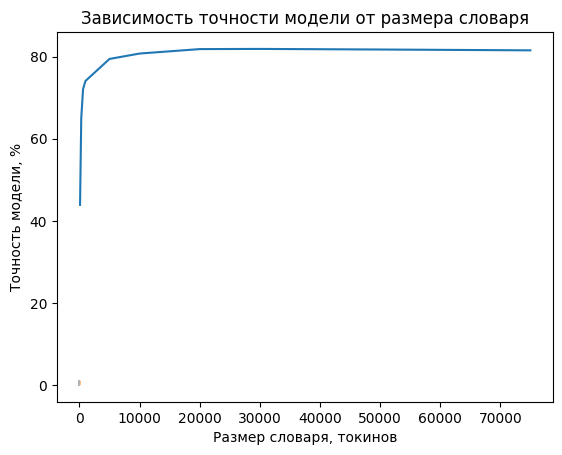

In [183]:
import matplotlib.pyplot as plt
plt.title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ —Å–ª–æ–≤–∞—Ä—è")
plt.plot(shape_vocabulary_iter, Precision)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel("–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏, %")
plt.xlabel("–†–∞–∑–º–µ—Ä —Å–ª–æ–≤–∞—Ä—è, —Ç–æ–∫–∏–Ω–æ–≤")
plt.show()

In [184]:
from sklearn.feature_extraction.text import CountVectorizer

#count = CountVectorizer(vocabulary = set(X_train_words), max_df=10)
count = CountVectorizer( max_features=20000)
X_train_transformed = count.fit_transform(X_train)

In [185]:
X_train_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [186]:
X_train_transformed.shape

(6926, 20000)

In [187]:
vocabulary_count = set(count.get_feature_names_out())

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42, n_jobs=-1)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)
print(score.mean())
print(cross_val_score(log_clf, X_train_transformed, y_train, scoring='accuracy'))
print(cross_val_score(log_clf, X_train_transformed, y_train, scoring='f1_macro'))

[CV] END ................................ score: (test=0.817) total time=   2.1s
[CV] END ................................ score: (test=0.822) total time=   2.4s
[CV] END ................................ score: (test=0.817) total time=   2.1s
0.8185097672458936
[0.83477633 0.83032491 0.83898917 0.84043321 0.81949458]
[0.83311497 0.83406376 0.83117165 0.83888255 0.82029527]


In [189]:
count.get_feature_names_out()

array(['ababil', 'adani', 'aes', ..., '·ä≠·çç·àà', '·ãà·àç·ã∞', '·ã®·ä¢·âµ·ãÆ·åµ·ã´'],
      dtype=object)

In [190]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = count.transform(X_test)

log_clf = LogisticRegression(solver="lbfgs", max_iter=20000, random_state=42)
log_clf.fit(X_test_transformed, y_test)

y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred, average='weighted')))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred, average='weighted')))

Precision: 98.79%
Recall: 98.73%


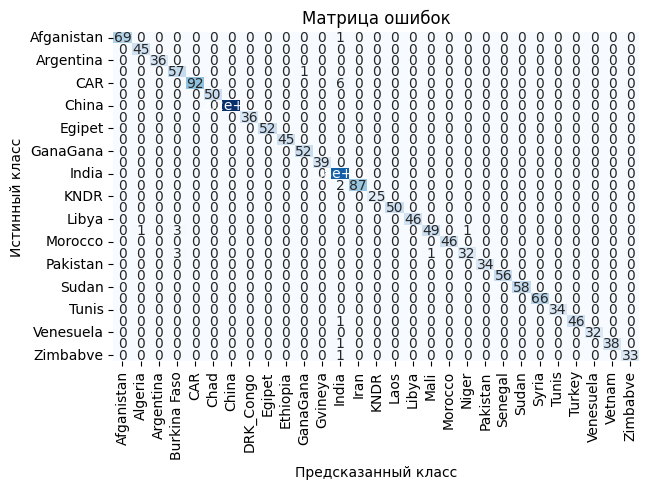

In [191]:
# –ó–∞–≥—Ä—É—ç–∏~—å –±–∏–±–ª–∏–æ~–µ–∫–∏
import matplotlib.pyplot as plt
import seaborn as sns #pip install seaborn
from sklearn.metrics import confusion_matrix
import pandas as pd
# –°–æ–∑–¥–∞—Ç—å –º–∞—Ç—Ä–∏—Ü—É –æ—à–∏–±–æ–∫
matrix = confusion_matrix(y_test, y_pred)
# –°–æ–∑–¥–∞—Ç—å —Å—Ç—Ä—É–∫—Ç—É—Ä—É DataFrame –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ pandas
dataframe = pd.DataFrame(matrix, index=log_clf.classes_, columns=log_clf.classes_)
# –°–æ–∑–¥–∞—Ç—å —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Ma—Çp–∏—Üa –æ—à–∏–±–æ–∫")
plt.tight_layout()
plt.ylabel("–ò—Å—Ç–∏–Ω–Ω—ã–π –∫–ª–∞—Å—Å")
plt.xlabel("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –∫–ª–∞—Å—Å")
plt.show()

In [192]:
import pickle
with open('contry_post-model_ngram_LogReg.bin', 'wb') as f_out:
    pickle.dump([log_clf, log_clf.classes_], f_out)

In [193]:
new_text = ['–ù–∏–≥–µ—Ä –ø–æ—Å–ª–µ–¥–æ–≤–∞–ª –ø—Ä–∏–º–µ—Ä—É –ú–∞–ª–∏, —Ä–∞–∑–æ—Ä–≤–∞–≤ —Å–≤—è–∑–∏ —Å –£–∫—Ä–∞–∏–Ω–æ–π –ø–æ—Å–ª–µ —Ç–æ–≥–æ, –∫–∞–∫ –ø—Ä–µ—Å—Å-—Å–µ–∫—Ä–µ—Ç–∞—Ä—å —Ä–∞–∑–≤–µ–¥—ã–≤–∞—Ç–µ–ª—å–Ω–æ–≥–æ –∞–≥–µ–Ω—Ç—Å—Ç–≤–∞ –ú–∏–Ω–∏—Å—Ç–µ—Ä—Å—Ç–≤–∞ –æ–±–æ—Ä–æ–Ω—ã –£–∫—Ä–∞–∏–Ω—ã –ø—Ä–∏–∑–Ω–∞–ª, —á—Ç–æ –£–∫—Ä–∞–∏–Ω–∞ –æ–∫–∞–∑—ã–≤–∞–ª–∞ –ø–æ–¥–¥–µ—Ä–∂–∫—É –ø–æ–≤—Å—Ç–∞–Ω—Ü–∞–º, –∫–æ—Ç–æ—Ä—ã–µ —É–±–∏–ª–∏ –º–∞–ª–∏–π—Å–∫–∏—Ö –≤–æ–æ—Ä—É–∂–µ–Ω–Ω—ã—Ö —Å–∏–ª –∏ —Ä–æ—Å—Å–∏–π—Å–∫–∏—Ö –∞–≥–µ–Ω—Ç–æ–≤ 25-27 –∏—é–ª—è –≤ –¢–∏–Ω–∑–∞—É–∞—Ç–µ–Ω–µ, –Ω–∞ —Å–µ–≤–µ—Ä–µ –ú–∞–ª–∏, –Ω–µ–¥–∞–ª–µ–∫–æ –æ—Ç –≥—Ä–∞–Ω–∏—Ü—ã —Å –ê–ª–∂–∏—Ä–æ–º.–ü–æ—Å–æ–ª –£–∫—Ä–∞–∏–Ω—ã –≤ –°–µ–Ω–µ–≥–∞–ª–µ —Ç–∞–∫–∂–µ –≤—ã—Ä–∞–∑–∏–ª –±–µ–∑–æ–≥–æ–≤–æ—Ä–æ—á–Ω—É—é –ø–æ–¥–¥–µ—Ä–∂–∫—É –º–∞–ª–∏–π—Å–∫–∏–º –ø–æ–≤—Å—Ç–∞–Ω—Ü–∞–º, —á—Ç–æ –ø—Ä–∏–≤–µ–ª–æ –∫ –≤—ã–∑–æ–≤—É –ø–æ—Å–ª–∞ –≤ –ú–ò–î –°–µ–Ω–µ–≥–∞–ª–∞.',
            '–ï—â–µ –Ω–æ–≤–æ—Å—Ç–∏ –∞—Ñ–≥–∞–Ω—Å–∫–æ–π –ø—Ä–æ–º—ã—à–ª–µ–Ω–Ω–æ—Å—Ç–∏. –í –ö–∞–Ω–¥–∞–≥–∞—Ä–µ —Å–ø—É—Å—Ç—è 18 –ª–µ—Ç –≤–æ–∑–æ–±–Ω–æ–≤–∏–ª–∞ —Ä–∞–±–æ—Ç—É —Ç–µ–∫—Å—Ç–∏–ª—å–Ω–∞—è —Ñ–∞–±—Ä–∏–∫–∞. –û—Ñ–∏—Ü–∏–∞–ª—å–Ω—ã–µ –ª–∏—Ü–∞ –≥–æ–≤–æ—Ä—è—Ç, —á—Ç–æ –æ–Ω–∏ –æ—Ç—Ä–µ–º–æ–Ω—Ç–∏—Ä–æ–≤–∞–ª–∏ –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ –Ω–∞ —Ñ–∞–±—Ä–∏–∫–µ –∑–∞ —à–µ—Å—Ç—å –º–µ—Å—è—Ü–µ–≤, —Å–æ–æ–±—â–∞—é—Ç –∞—Ñ–≥–∞–Ω—Å–∫–æ–µ –°–ú–ò. –ü–æ —Å–ª–æ–≤–∞–º —Ä–∞–±–æ—Ç–Ω–∏–∫–æ–≤ —Ñ–∞–±—Ä–∏–∫–∏, —Å –≤–æ–∑–æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ–º —Ä–∞–±–æ—Ç—ã —Ñ–∞–±—Ä–∏–∫–∏ —Å–æ–∑–¥–∞–Ω—ã —Ä–∞–±–æ—á–∏–µ –º–µ—Å—Ç–∞. 69-–ª–µ—Ç–Ω–∏–π –ú–æ—Ö–∞–º–º–∞–¥, –ø—Ä–æ—Ä–∞–±–æ—Ç–∞–≤—à–∏–π –Ω–∞ —Ç–µ–∫—Å—Ç–∏–ª—å–Ω–æ–π —Ñ–∞–±—Ä–∏–∫–µ –≤ –ö–∞–Ω–¥–∞–≥–∞—Ä–µ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ –≤—Ä–µ–º—è, —Ä–∞–¥ –≤–µ—Ä–Ω—É—Ç—å—Å—è –Ω–∞ —Ä–∞–±–æ—Ç—É.',
           '–ù–∞–∫–æ–ø–ª–µ–Ω–Ω–æ–µ –Ω–µ–ø–æ–Ω–∏–º–∞–Ω–∏–µ –º–µ–∂–¥—É –ö–∏—Ç–∞–µ–º –∏ –°–®–ê –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å —Ä–µ—à–µ–Ω–æ –ª–∏—à—å –æ–¥–Ω–∏–º –ø–æ–¥–æ–±–Ω—ã–º –∏–∑—è—â–Ω—ã–º –∂–µ—Å—Ç–æ–º. –°—Ç—Ä–∞–Ω—ã —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è –ø–æ —à–∏—Ä–æ–∫–æ–º—É –∫—Ä—É–≥—É –≤–æ–ø—Ä–æ—Å–æ–≤, —Å–∞–Ω–∫—Ü–∏–æ–Ω–Ω—ã–π –º–µ—Ö–∞–Ω–∏–∑–º –ø—Ä–æ—Ç–∏–≤ –ö–∏—Ç–∞—è –Ω–µ –æ—Å–ª–∞–±–ª–µ–Ω. –ü–æ—ç—Ç–æ–º—É –æ—Ç–ø—Ä–∞–≤–∫–∞ –ø–∞–Ω–¥ ‚Äì —ç—Ç–æ —Å–∫–æ—Ä–µ–µ –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏—è –º–∏—Ä–æ–ª—é–±–∏–≤–æ–π –ø–æ–∑–∏—Ü–∏–∏ –ö–∏—Ç–∞—è –≤ –ø—Ä–æ—Ç–∏–≤–æ–≤–µ—Å –°–®–ê.',
            '–í –ê–ª–∂–∏—Ä, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, –Ω–∞ –ø–æ—Ö–æ—Ä–æ–Ω–∞—Ö –º—É–∂—á–∏–Ω—ã —Å–∏–¥—è—Ç –æ–∫–æ–ª–æ –¥–æ–º–∞, —Ö–æ—Ä–æ—à–æ, –µ—Å–ª–∏ –µ—Å—Ç—å —Å–∞–¥ –∏–ª–∏ —Ç–µ—Ä—Ä–∞—Å–∞, –∞ –∂–µ–Ω—â–∏–Ω—ã –≤ –¥–æ–º–µ, –Ω–∞–¥–µ—Ç—å –ø–ª–∞—Ç–æ–∫ –∂–µ–Ω—â–∏–Ω–∞ –¥–æ–ª–∂–Ω–∞ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ, –¥–∞–∂–µ –µ—Å–ª–∏ –≤ –æ–±—ã—á–Ω–æ–π –∂–∏–∑–Ω–∏ –æ–Ω–∞ –Ω–µ –ø–æ–∫—Ä—ã–≤–∞–µ—Ç –≥–æ–ª–æ–≤—É. –ï—Å–ª–∏ –ø–æ–∫–æ–π–Ω—ã–π –∂–∏–ª –≤ –∫–≤–∞—Ä—Ç–∏—Ä–µ, —Ç–æ –ø—Ä—è–º–æ –≤–æ –¥–≤–æ—Ä–µ —Å—Ç–∞–≤—è—Ç —Å—Ç—É–ª—å—è –∏ —à–∞—Ç—Ä—ã —Å–æ —Å—Ç–æ–ª–∞–º–∏ –¥–ª—è –º—É–∂—á–∏–Ω.–ì–æ—Ç–æ–≤—è—Ç –ª–∏–±–æ –Ω–∞–Ω—è—Ç—ã–µ –∫—É—Ö–∞—Ä–∫–∏, –ª–∏–±–æ —Ä–æ–¥—Å—Ç–≤–µ–Ω–Ω–∏—Ü—ã –ø–æ–∫–æ–π–Ω–æ–≥–æ. –ü–æ–∫–∞ —Å–æ—Å—Ç–∞–≤–ª—è–ª–∞ –ø–æ—Å—Ç –æ—Ç –ø–æ–¥—Ä—É–≥–∏ —É—Å–ª—ã—à–∞–ª–∞,—á—Ç–æ –≤ –∏—Ö —Å–µ–º—å–µ —á–∞—Å—Ç–æ –µ–¥—É –ø—Ä–∏–Ω–æ—Å—è—Ç —Ç–µ, –∫—Ç–æ –ø—Ä–∏—Ö–æ–¥–∏—Ç –≤ –¥–æ–º, –∞ –≥–æ—Ç–æ–≤–∏—Ç—å –¥–æ–ª–∂–Ω—ã –Ω–µ–≤–µ—Å—Ç–∫–∏, –∞ –Ω–µ –¥–æ—á–µ—Ä–∏ —É–º–µ—Ä—à–µ–≥–æ. –ú–æ–π –º—É–∂ —Å–∫–∞–∑–∞–ª, —á—Ç–æ —ç—Ç–æ —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –Ω–µ–æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ, –Ω–∞ –ø–æ—Ö–æ—Ä–æ–Ω–∞—Ö –µ–≥–æ –±–∞–±—É—à–∫–∏ –≥–æ—Ç–æ–≤–∏–ª–∏ —Ç–æ–ª—å–∫–æ –µ—ë –¥–æ—á–µ—Ä–∏, —ç—Ç–æ –±—ã–ª–æ –∏—Ö –∂–µ–ª–∞–Ω–∏–µ –∏ –Ω–∏–∫–∞–∫–∏—Ö –æ—Å–æ–±—ã—Ö –ø—Ä–∞–≤–∏–ª –Ω–∞ —Å—á—ë—Ç —ç—Ç–æ–≥–æ –Ω–µ—Ç. –û–±—è–∑–∞—Ç–µ–ª—å–Ω–æ–≥–æ –±–ª—é–¥–∞ –Ω–∞ –ø–æ–º–∏–Ω–∫–∏ –≤ –ê–ª–∂–∏—Ä–µ –Ω–µ—Ç. –ù–∞—Ä–æ–¥ –ø—Ä–∏—Ö–æ–¥–∏—Ç –ø–æ–º—è–Ω—É—Ç—å–æ—Ç —Ç—Ä–µ—Ö –¥–Ω–µ–π –¥–æ –Ω–µ–¥–µ–ª–∏, –µ—Å–ª–∏ —É —á–µ–ª–æ–≤–µ–∫–∞ –±—ã–ª–∞ –±–æ–ª—å—à–∞—è —Å–µ–º—å—è –∏ –º–Ω–æ–≥–æ –∑–Ω–∞–∫–æ–º—ã—Ö!–ö–æ—Ä–º—è—Ç —Ç—Ä–∞–¥–∏—Ü–∏–æ–Ω–Ω—ã–º–∏ –±–ª—é–¥–∞–º–∏: —Å—É–ø-—à–æ—Ä–±–∞, –∫—É—Å-–∫—É—Å/–±–µ—Ä–∫—É–∫–µ—Å/—Ç–ª–∏—Ç–ª–∏ —Å –º—è—Å–æ–º –∏ —Ç.–¥.–ú–æ–≥–∏–ª—É –ø–æ—Å–µ—â–∞—é—Ç –∫–∞–∂–¥–æ–µ —É—Ç—Ä–æ, –≤ —Ç–µ—á–µ–Ω–∏–∏ —Ç—Ä–µ—Ö –¥–Ω–µ–π. –ß–µ—Ä–µ–∑ 40 –¥–Ω–µ–π —É—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—é—Ç –Ω–µ–±–æ–ª—å—à–æ–µ –Ω–∞–¥–≥—Ä–æ–±–∏–µ, –Ω–∏–∫–∞–∫–∏—Ö –ø–∞–º—è—Ç–Ω–∏–∫–æ–≤,–≤—ã—á—É—Ä–Ω—ã—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤. –ù–∞ –Ω–∞–¥–≥—Ä–æ–±–∏–∏ –∏–º—è, —Ñ–∞–º–∏–ª–∏—è, –¥–∞—Ç—ã —Ä–æ–∂–¥–µ–Ω–∏—è –∏ —Å–º–µ—Ä—Ç–∏, —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–π –Ω–µ—Ç. –í—Ä–æ–¥–µ –±—ã –Ω–∞–ø–∏—Å–∞–ª–∞ –≤—Å—ë, —á—Ç–æ –∑–Ω–∞–ª–∞. –ó–∞–¥–∞–≤–∞–π—Ç–µ –≤–æ–ø—Ä–æ—Å—ã –≤ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è—Ö, –µ—Å–ª–∏ —Ç–∞–∫–æ–≤—ã–µ –∏–º–µ—é—Ç—Å—è.',
            '–°–µ–≥–æ–¥–Ω—è –≤ –í–µ–Ω–µ—Å—É—ç–ª–µ –ø—Ä–æ—Ö–æ–¥—è—Ç –ø—Ä–µ–∑–∏–¥–µ–Ω—Ç—Å–∫–∏–µ –≤—ã–±–æ—Ä—ã. –ú–æ–π –∫–æ–ª–ª–µ–≥–∞ –î–º–∏—Ç—Ä–∏–π –ú–æ—Ä–æ–∑–æ–≤ —Ä–∞—Å—Å—É–∂–¥–∞–µ—Ç, –∫–∞–∫ –∏—Ö –∏—Ç–æ–≥–∏ –º–æ–≥—É—Ç –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ –¥–∞–ª—å–Ω–µ–π—à–∏–π –ø—É—Ç—å —Å—Ç—Ä–∞–Ω—ã. –í–æ—Ç —Å–∞–º–æ–µ –≤–∞–∂–Ω–æ–µ –∏–∑ –µ–≥–æ —Å—Ç–∞—Ç—å–∏.üìç–í –≤—ã–±–æ—Ä–∞—Ö –æ–¥–∏–Ω —Ç—É—Ä, —É—á–∞—Å—Ç–≤—É—é—Ç –¥–µ—Å—è—Ç—å –∫–∞–Ω–¥–∏–¥–∞—Ç–æ–≤, –æ–¥–Ω–∞–∫–æ —Ç–æ–ª—å–∫–æ –¥–≤–æ–µ –∏–º–µ—é—Ç —Ä–µ–∞–ª—å–Ω—ã–µ —à–∞–Ω—Å—ã –Ω–∞ –ø–æ–±–µ–¥—É: –¥–µ–π—Å—Ç–≤—É—é—â–∏–π –ø—Ä–µ–∑–∏–¥–µ–Ω—Ç –ù–∏–∫–æ–ª–∞—Å –ú–∞–¥—É—Ä–æ –∏ –≠–¥–º—É–Ω–¥–æ –ì–æ–Ω—Å–∞–ª–µ—Å –£—Ä—Ä—É—Ç–∏—è, –∫–∞–Ω–¥–∏–¥–∞—Ç –æ—Ç –ï–¥–∏–Ω–æ–π –¥–µ–º–æ–∫—Ä–∞—Ç–∏—á–µ—Å–∫–æ–π –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã, –æ–±—ä–µ–¥–∏–Ω—è—é—â–µ–π –Ω–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–µ –æ–ø–ø–æ–∑–∏—Ü–∏–æ–Ω–Ω—ã–µ –ø–∞—Ä—Ç–∏–∏.'
           ]
x_temp = []
for post_temp in new_text:
        content = str(post_temp).lower()  
        content = remove_emojis(content)
        content = remove_chars_from_text(content, spec_chars)
        content = remove_chars_from_text(content, string.digits)
        for i in range(1, 10):
            content = content.replace('  ', ' ')
        filtered_words = []
        for token in content.split():
            if token not in ru_stopwords and len(token)>2:
                if stemming and token is not None:
                    filtered_words.append(stemmer.stem(token))
                    #print('{} -{}'.format(token,stemmer.stem(token)))
                else:
                    filtered_words.append(token)
        content = ' '.join(filtered_words)                      
        x_temp.append(content)
   
count = CountVectorizer(vocabulary = set(count.get_feature_names_out()))
#count = CountVectorizer(vocabulary = set(X_train_words))
X_t = count.transform(x_temp)
accuracy = log_clf.predict(X_t)
print (accuracy)
print ('Predicted Probabilities: {} - {}'.format(log_clf.predict(X_t), log_clf.predict_proba(X_t)))

['Mali' 'Afganistan' 'China' 'India' 'Venesuela']
Predicted Probabilities: ['Mali' 'Afganistan' 'China' 'India' 'Venesuela'] - [[0.002054   0.01103182 0.00129727 0.00400233 0.00472524 0.00246321
  0.00548178 0.00146516 0.00228592 0.00254718 0.00443961 0.00181452
  0.00653762 0.00300382 0.00182043 0.00347158 0.00671317 0.43909294
  0.0037556  0.14309018 0.00241513 0.31961484 0.00394624 0.00634305
  0.00372589 0.00319124 0.00318607 0.00411529 0.00236887]
 [0.60508509 0.00421004 0.01039287 0.01957629 0.01633972 0.011134
  0.07129863 0.00849252 0.00686009 0.02885533 0.01470615 0.01626273
  0.01472495 0.02068761 0.00684359 0.00701443 0.01090507 0.03263778
  0.00468698 0.00478148 0.00548577 0.00956955 0.01411732 0.01249553
  0.01198534 0.00780419 0.00513024 0.00979452 0.0081222 ]
 [0.00707197 0.00340051 0.00410068 0.01980333 0.01430075 0.00605838
  0.67267288 0.00338759 0.00822443 0.00505021 0.00666146 0.00537002
  0.06588837 0.03146305 0.01318384 0.00974109 0.00442415 0.00749904
  0.0041490

In [194]:
log_clf.classes_

array(['Afganistan', 'Algeria', 'Argentina', 'Burkina Faso', 'CAR',
       'Chad', 'China', 'DRK_Congo', 'Egipet', 'Ethiopia', 'GanaGana',
       'Gvineya', 'India', 'Iran', 'KNDR', 'Laos', 'Libya', 'Mali',
       'Morocco', 'Niger', 'Pakistan', 'Senegal', 'Sudan', 'Syria',
       'Tunis', 'Turkey', 'Venesuela', 'Vetnam', 'Zimbabve'], dtype='<U12')